# Flatiron School Module 1 Final Project - Alexi Zalk 

## Introduction

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry. Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

## Deliverables
1. A well documented Jupyter Notebook containing any code you've written for this project and comments explaining it. This work will need to be pushed to your GitHub repository in order to submit your project.
2. An organized README.md file in the GitHub repository that describes the contents of the repository. This file should be the source of information for navigating through the repository.
3. A short Keynote/PowerPoint/Google Slides presentation (delivered as a PDF export) giving a high-level overview of your methodology and recommendations for non-technical stakeholders. Make sure to also add and commit this pdf of your non-technical presentation to your repository with a file name of presentation.pdf.
4. A Blog Post
5. A Video Walkthrough of your non-technical presentation. Some common video recording tools used are Zoom, Quicktime, and Nimbus. After you record your presentation, publish it on a service like YouTube or Google Drive, you will need a link to the video to submit your project.

## Dataset

Included in the repository (in the folder zippedData) is some movie-related data from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB.org

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/alexizalk/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


I'm going to start by taking a look at what's in the `zippedData` folder on my computer. I unzipped the files and took a look at them all in `Excel`. The folder is renamed `Data`.

In [2]:
ls Data

bom.movie_gross.csv        imdb.title.ratings.csv
imdb.name.basics.csv       rt.movie_info.tsv
imdb.title.akas.csv        rt.reviews.csv
imdb.title.basics.csv      rt.reviews.tsv
imdb.title.crew.csv        tmdb.movies.csv
imdb.title.principals.csv  tn.movie_budgets.csv


Load all these `csv` files into dataframes and preview them

In [3]:
# Check out the fist file
box_gross_df = pd.read_csv('Data/bom.movie_gross.csv')
print(list(box_gross_df.columns))
box_gross_df.head(2)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [4]:
# Load the IMDB files
imdb_names_df = pd.read_csv('Data/imdb.name.basics.csv')
imdb_akas_df = pd.read_csv('Data/imdb.title.akas.csv')
imdb_basics_df = pd.read_csv('Data/imdb.title.basics.csv')
imdb_crew_df = pd.read_csv('Data/imdb.title.crew.csv')
imdb_principals_df = pd.read_csv('Data/imdb.title.principals.csv')
imdb_ratings_df = pd.read_csv('Data/imdb.title.ratings.csv')

In [5]:
print(list(imdb_names_df.columns))
print(list(imdb_akas_df.columns))
print(list(imdb_basics_df.columns))
print(list(imdb_crew_df.columns))
print(list(imdb_principals_df.columns))
print(list(imdb_ratings_df.columns))

['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
['title_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
['tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']
['tconst', 'directors', 'writers']
['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']
['tconst', 'averagerating', 'numvotes']


In [6]:
imdb_akas_df.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [7]:
# Checking to see if 'title_id' matches 'tconst'
imdb_basics_df.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


The `read_csv` function had trouble reading the `rt.reviews.tsv` files, so I resaved it as a `csv`

In [8]:
rt_reviews_df = pd.read_csv('Data/rt.reviews.csv')
print(list(rt_reviews_df.columns))
rt_reviews_df.head(2)

['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,5-Mar,fresh,PJ Nabarro,0,Patrick Nabarro,10-Nov-18
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,23-May-18


In [9]:
# Load the rest of the files
rt_info_df = pd.read_csv('Data/rt.movie_info.tsv', sep='\t')
moviedb_df = pd.read_csv('Data/tmdb.movies.csv')
tn_budgets_df = pd.read_csv('Data/tn.movie_budgets.csv')

In [10]:
print(list(rt_info_df.columns))
print(list(moviedb_df.columns))
print(list(tn_budgets_df.columns))

['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']
['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']
['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


In [11]:
#Do either Rotten Tomatoes DataFrames have a title anywhere? Nope
rt_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [12]:
moviedb_df.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [13]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [14]:
print('imdb_names_df', imdb_names_df.shape)
print('imdb_akas_df', imdb_akas_df.shape)
print('imdb_basics_df', imdb_basics_df.shape)
print('imdb_crew_df', imdb_crew_df.shape)
print('imdb_principals_df', imdb_principals_df.shape)
print('imdb_ratings_df', imdb_ratings_df.shape)
print('box_gross_df', box_gross_df.shape)
print('tn_budgets_df', tn_budgets_df.shape)
print('moviedb_df', moviedb_df.shape)
print('rt_reviews_df', rt_reviews_df.shape)
print('rt_info_df', rt_info_df.shape)

imdb_names_df (606648, 6)
imdb_akas_df (331703, 8)
imdb_basics_df (146144, 6)
imdb_crew_df (146144, 3)
imdb_principals_df (1028186, 6)
imdb_ratings_df (73856, 3)
box_gross_df (3387, 5)
tn_budgets_df (5782, 6)
moviedb_df (26517, 10)
rt_reviews_df (54432, 8)
rt_info_df (1560, 12)


The `id` column on `tn_budgets_df` and `moviedb_df` **DO NOT** match the Rotten Tomatoes ids

### How the DataBases are Connected
<img src='images/DatabaseSchema.png' width="600">

### Thoughts after taking a look at the connections

After looking at all the connections, I don't know how the Rotten Tomatoes data will fit in with the rest since it doesn't have and titles or ways to connect it to the rest of the data. The ratings also exist in the IMDB data, and that'll be a lot easier to tie in.

* I will start with the `IMDB` data. It is well connected and includes general info and ratings.
* The `box_gross_df` and/or `tn_budgets` will be helpful to gauge success in a dollar amount. I'm curious to see how well joining using `title` or `movie` will work between the `IMDB` data these dataframes.
* Lastly, `moviesdb` will provide additional information on the popularity of the movies via ratings. We'll see how joining via `original_title` or `title` to the `IMDB` data works here as well.
* There should be enough data here to end up with some decent insights.

* The size of the dataframes vary as you can see above. I'm going to take that into account

## What type of film should Microsoft be creating?

Let's start by taking a look at the most successful films by using `imbd_basics` and `imdb_ratings`

In [15]:
# Default merge is inner merge, so we'll lose about half the data from imdb_basics
# Data without ratings isn't really useful to us though
imdb_basics_ratings = imdb_ratings_df.merge(imdb_basics_df, on='tconst')
print(imdb_basics_ratings.shape)
imdb_basics_ratings.head()

(73856, 8)


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


What are the genres? And which genres have the highest ratings?

In [16]:
list(imdb_basics_ratings['genres'].unique())

['Romance',
 'Documentary',
 'Drama',
 'Action,Adventure,Fantasy',
 'Mystery,Thriller',
 'Comedy,Romance',
 'Biography,Drama,Sport',
 'Drama,Thriller',
 'Drama,War',
 'Action,Adventure,Sci-Fi',
 'Comedy',
 'Comedy,Drama,Romance',
 'Adventure,Animation,Drama',
 'Thriller',
 'Drama,Fantasy,Romance',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Thriller',
 'Action,Comedy,Crime',
 'Biography,Drama',
 'Documentary,History,Sport',
 'Documentary,War',
 'Drama,Fantasy',
 'Sci-Fi,Thriller',
 'Fantasy,Horror,Thriller',
 'Comedy,Crime,Drama',
 'Comedy,Thriller',
 'Horror',
 'Comedy,Crime,History',
 'Comedy,Documentary',
 'Biography,Documentary',
 'Drama,Romance',
 'Drama,Music,Romance',
 'Action,Horror,Thriller',
 'Comedy,Horror',
 'Comedy,Drama',
 'Adventure,Family,Fantasy',
 'Horror,Thriller',
 'Comedy,Drama,Thriller',
 'Documentary,Music',
 'Animation',
 'Action,Adventure',
 'Action,Drama',
 'Drama,Family,Fantasy',
 'Action,Comedy,Horror',
 'Crime,Drama,Horror',
 'Documentary,Sport',
 'Co

There are A LOT of genres and the majority of movies have a few genres attached to them. To make the dataset easier, let's pair it down using the following:

* Movies that have an average rating of at least 7.0
* Movies that have at least 100 votes

In [17]:
ratings = imdb_basics_ratings[(imdb_basics_ratings['averagerating'] >= 7.0) & 
                                    (imdb_basics_ratings['numvotes'] >= 100)]
print(ratings.shape)
ratings.head()

(6545, 8)


,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
8,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War"
12,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama"
16,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport"


That paired down the size of our dataset by a lot. Just looking at this list, some of these movies are probably too expensive for a new studio to produce and some may not have made that much money. Unfortunately, our `IMDB` datasets don't include any information on production budgets or profit. Let's see how many of these movie titles match with our `tn_budgets` data.

In [18]:
# Will the primary_title or original_title have more matches? My guess is primary_title
popular_finances1 = tn_budgets_df.merge(ratings, left_on='movie', right_on='primary_title')
print(popular_finances1.shape)
popular_finances1.head(2)

(584, 14)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


That leaves us with 584 movie titles down from 6,545. Let's check two other ways to match more results.

In [19]:
# Checking original_title
popular_finances2 = tn_budgets_df.merge(ratings, left_on='movie', right_on='original_title')
print(popular_finances2.shape)
popular_finances2.head(2)

(540, 14)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,665594,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
1,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,8.5,670926,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [20]:
# Now merging with imdb_akas before merging with tn_budgets
df = ratings.merge(imdb_akas_df, left_on='tconst', right_on='title_id')
popular_finances3 = tn_budgets_df.merge(df, left_on='movie', right_on='title')
print(popular_finances3.shape)
popular_finances3.head(2)

(2973, 22)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,runtime_minutes,genres,title_id,ordering,title,region,language,types,attributes,is_original_title
0,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,15,Avengers: Age of Ultron,US,NaN,NaN,NaN,0.0
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,19,Avengers: Age of Ultron,DE,NaN,imdbDisplay,NaN,0.0


The 3rd way matched the most results, so let's use that version.

In [21]:
popular_finances = popular_finances3

In [22]:
popular_finances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2973 non-null   int64  
 1   release_date       2973 non-null   object 
 2   movie              2973 non-null   object 
 3   production_budget  2973 non-null   object 
 4   domestic_gross     2973 non-null   object 
 5   worldwide_gross    2973 non-null   object 
 6   tconst             2973 non-null   object 
 7   averagerating      2973 non-null   float64
 8   numvotes           2973 non-null   int64  
 9   primary_title      2973 non-null   object 
 10  original_title     2973 non-null   object 
 11  start_year         2973 non-null   int64  
 12  runtime_minutes    2970 non-null   float64
 13  genres             2973 non-null   object 
 14  title_id           2973 non-null   object 
 15  ordering           2973 non-null   int64  
 16  title              2973 

In [23]:
# Need to remove '$' and ',' from production_budget, domestic_gross, worldwide_gross
# Need to change the Dtype to float64
popular_finances['production_budget'] = popular_finances.production_budget.apply(lambda x: x.strip('$'))
popular_finances['production_budget'] = popular_finances.production_budget.apply(lambda x: x.replace(',',''))
popular_finances['domestic_gross'] = popular_finances.domestic_gross.apply(lambda x: x.strip('$'))
popular_finances['domestic_gross'] = popular_finances.domestic_gross.apply(lambda x: x.replace(',',''))
popular_finances['worldwide_gross'] = popular_finances.worldwide_gross.apply(lambda x: x.strip('$'))
popular_finances['worldwide_gross'] = popular_finances.worldwide_gross.apply(lambda x: x.replace(',',''))
popular_finances

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,runtime_minutes,genres,title_id,ordering,title,region,language,types,attributes,is_original_title
0,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,15,Avengers: Age of Ultron,US,NaN,NaN,NaN,0.0
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,19,Avengers: Age of Ultron,DE,NaN,imdbDisplay,NaN,0.0
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,24,Avengers: Age of Ultron,NaN,NaN,original,NaN,1.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,3,Avengers: Age of Ultron,IT,NaN,imdbDisplay,NaN,0.0
4,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,665594,Avengers: Age of Ultron,...,141.0,"Action,Adventure,Sci-Fi",tt2395427,9,Avengers: Age of Ultron,CZ,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,95,"Mar 17, 2015",Closure,100000,0,0,tt2405862,8.0,150,Closure,...,76.0,"Adventure,Biography,Documentary",tt2405862,1,Closure,US,NaN,NaN,NaN,0.0
2969,26,"Dec 31, 2014",The Image Revolution,50000,0,0,tt2294916,7.2,156,The Image Revolution,...,81.0,"Biography,Documentary",tt2294916,1,The Image Revolution,US,NaN,NaN,NaN,0.0
2970,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,83.0,Drama,tt4266638,1,Krisha,US,NaN,NaN,NaN,0.0
2971,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,83.0,Drama,tt4266638,2,Krisha,CZ,NaN,festival,NaN,0.0


In [24]:
# Need to change the Dtype to int64 for production_budget, domestic_gross, worldwide_gross
popular_finances['production_budget'] = pd.to_numeric(popular_finances['production_budget'])
popular_finances['domestic_gross'] = pd.to_numeric(popular_finances['domestic_gross'])
popular_finances['worldwide_gross'] = pd.to_numeric(popular_finances['worldwide_gross'])

In [25]:
# Double check the Dtypes
popular_finances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2972
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2973 non-null   int64  
 1   release_date       2973 non-null   object 
 2   movie              2973 non-null   object 
 3   production_budget  2973 non-null   int64  
 4   domestic_gross     2973 non-null   int64  
 5   worldwide_gross    2973 non-null   int64  
 6   tconst             2973 non-null   object 
 7   averagerating      2973 non-null   float64
 8   numvotes           2973 non-null   int64  
 9   primary_title      2973 non-null   object 
 10  original_title     2973 non-null   object 
 11  start_year         2973 non-null   int64  
 12  runtime_minutes    2970 non-null   float64
 13  genres             2973 non-null   object 
 14  title_id           2973 non-null   object 
 15  ordering           2973 non-null   int64  
 16  title              2973 

In [26]:
# Get min + max for budget + gross
print('Production Budget Min:', popular_finances['production_budget'].min())
print('Production Budget Max:', popular_finances['production_budget'].max())
print('Production Budget Mean:', popular_finances['production_budget'].mean())
print('')
print('Domestic Gross Min:', popular_finances['domestic_gross'].min())
print('Domestic Gross Max:', popular_finances['domestic_gross'].max())
print('')
print('Worldwide Gross Min:', popular_finances['worldwide_gross'].min())
print('Worldwide Gross Max:', popular_finances['worldwide_gross'].max())

Production Budget Min: 30000
Production Budget Max: 330600000
Production Budget Mean: 60974158.291288264

Domestic Gross Min: 0
Domestic Gross Max: 700059566

Worldwide Gross Min: 0
Worldwide Gross Max: 2048134200


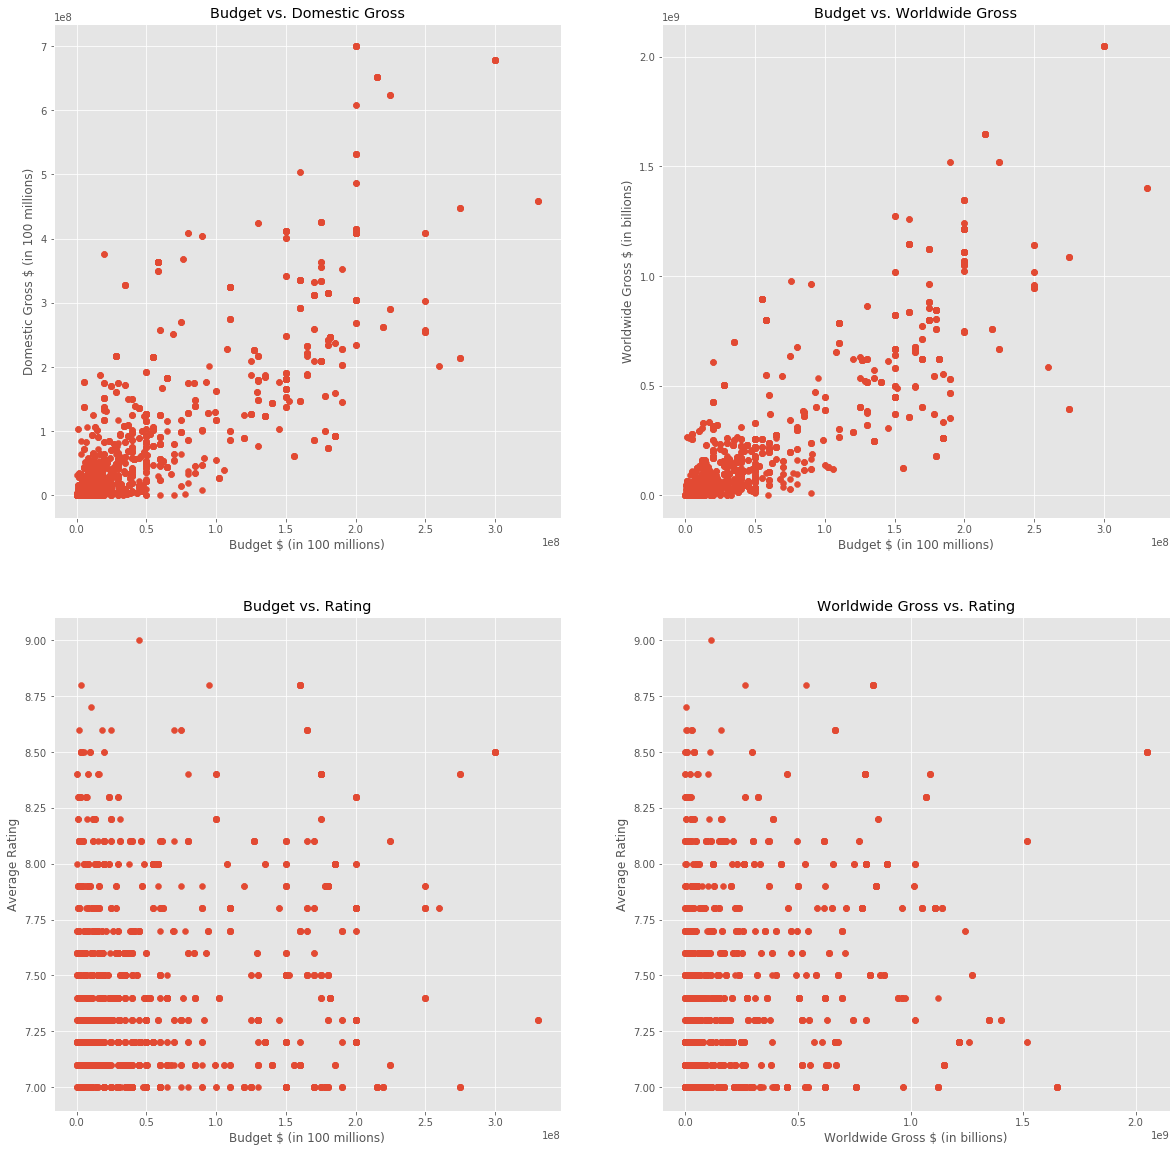

In [27]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,20))

ax1 = plt.subplot(221)
plt.scatter(popular_finances['production_budget'], popular_finances['domestic_gross'])
ax1.set_title('Budget vs. Domestic Gross')
ax1.set_xlabel('Budget $ (in 100 millions)')
ax1.set_ylabel('Domestic Gross $ (in 100 millions)')

ax2 = plt.subplot(222)
plt.scatter(popular_finances['production_budget'], popular_finances['worldwide_gross'])
ax2.set_title('Budget vs. Worldwide Gross')
ax2.set_xlabel('Budget $ (in 100 millions)')
ax2.set_ylabel('Worldwide Gross $ (in billions)')

ax3 = plt.subplot(223)
plt.scatter(popular_finances['production_budget'], popular_finances['averagerating'])
ax3.set_title('Budget vs. Rating')
ax3.set_xlabel('Budget $ (in 100 millions)')
ax3.set_ylabel('Average Rating')

ax4 = plt.subplot(224)
plt.scatter(popular_finances['worldwide_gross'], popular_finances['averagerating'])
ax4.set_title('Worldwide Gross vs. Rating')
ax4.set_xlabel('Worldwide Gross $ (in billions)')
ax4.set_ylabel('Average Rating');

There are a lot of high budget movies here that are skewing the results. Generally, based on the first two graphs, the more money spent, the higher grossing the film. There appears to be the highest range of success and data points for movies with a budget under 100M. Let's also assume that if we want to make a few movies to increase our chances of success, they each have to be under 100M budget. The maean movie also has a budget of about 60M, so 100M seems like a good number to include a range of results.

In [28]:
popular_cheap = popular_finances[popular_finances['production_budget'] < 100000000]
popular_cheap.shape

(2246, 22)

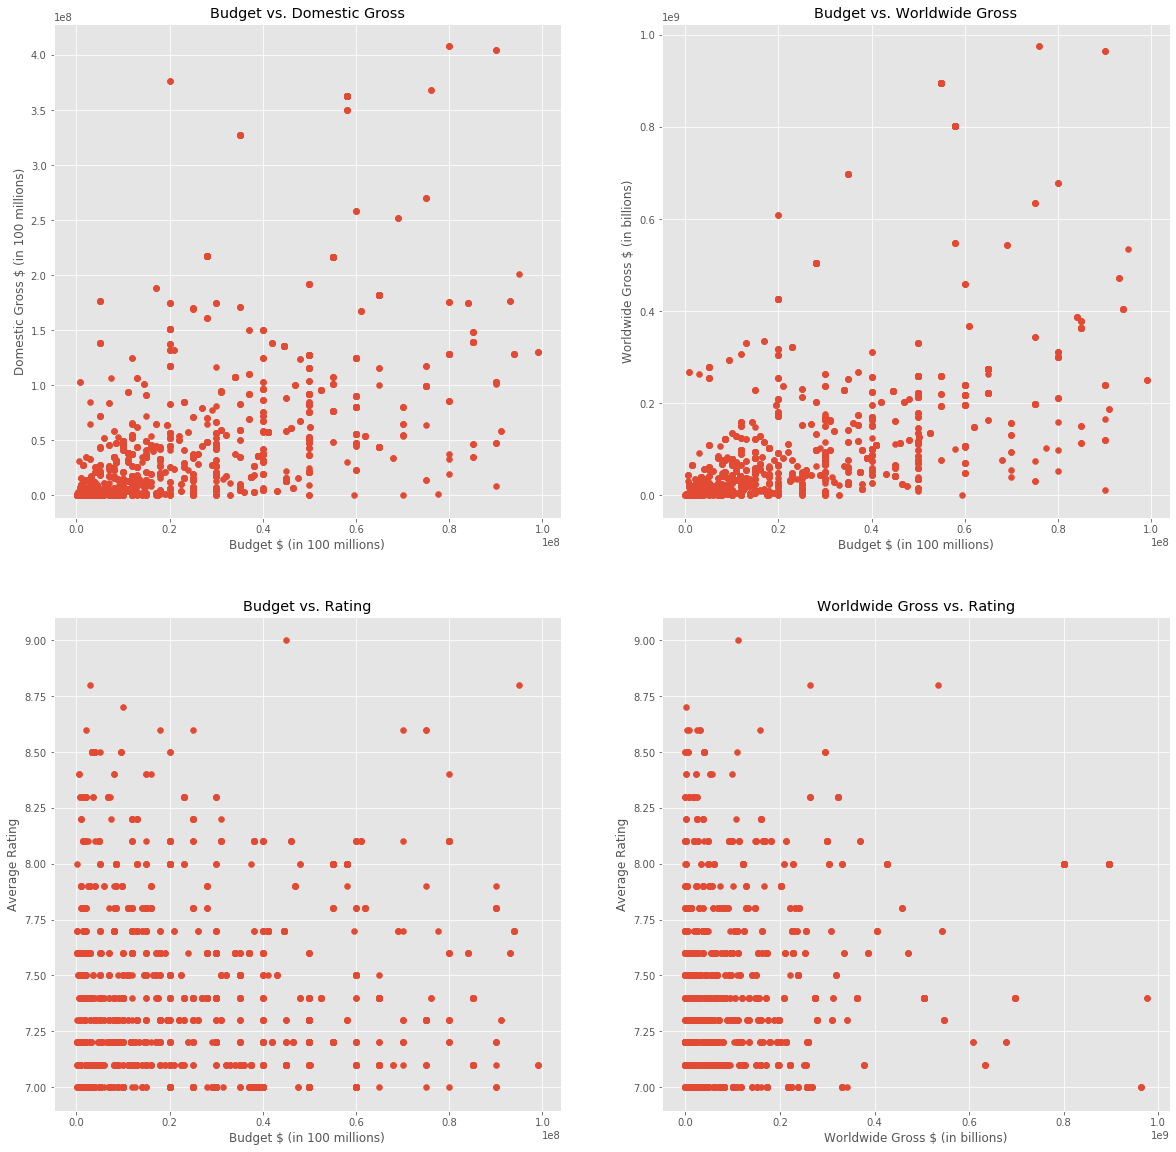

In [29]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (20,20))

ax1 = plt.subplot(221)
plt.scatter(popular_cheap['production_budget'], popular_cheap['domestic_gross'])
ax1.set_title('Budget vs. Domestic Gross')
ax1.set_xlabel('Budget $ (in 100 millions)')
ax1.set_ylabel('Domestic Gross $ (in 100 millions)')

ax2 = plt.subplot(222)
plt.scatter(popular_cheap['production_budget'], popular_cheap['worldwide_gross'])
ax2.set_title('Budget vs. Worldwide Gross')
ax2.set_xlabel('Budget $ (in 100 millions)')
ax2.set_ylabel('Worldwide Gross $ (in billions)')

ax3 = plt.subplot(223)
plt.scatter(popular_cheap['production_budget'], popular_cheap['averagerating'])
ax3.set_title('Budget vs. Rating')
ax3.set_xlabel('Budget $ (in 100 millions)')
ax3.set_ylabel('Average Rating')

ax4 = plt.subplot(224)
plt.scatter(popular_cheap['worldwide_gross'], popular_cheap['averagerating'])
ax4.set_title('Worldwide Gross vs. Rating')
ax4.set_xlabel('Worldwide Gross $ (in billions)')
ax4.set_ylabel('Average Rating');

Let's break down the successful movies on our list a little more. First, let's only include movies where the **Domestic Gross was 50% higher than the Production Budget**. Since the production budget doesn't include things like marketing, there needs to be a fair amount of money left over. With a new studio, focusing on the domestic market first is smart.

In [30]:
profitable = popular_cheap[popular_cheap['domestic_gross'] >= (popular_cheap['production_budget']*1.5)]
print(profitable.shape)
profitable.head(2)

(1041, 22)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,runtime_minutes,genres,title_id,ordering,title,region,language,types,attributes,is_original_title
194,100,"Mar 29, 1974",The Great Gatsby,7000000,26533200,26533200,tt1343092,7.3,433165,The Great Gatsby,...,143.0,"Drama,Romance",tt1343092,13,The Great Gatsby,US,NaN,imdbDisplay,NaN,0.0
195,100,"Mar 29, 1974",The Great Gatsby,7000000,26533200,26533200,tt1343092,7.3,433165,The Great Gatsby,...,143.0,"Drama,Romance",tt1343092,18,The Great Gatsby,NaN,NaN,original,NaN,1.0


I see there are some duplicates. Let's get rid of those. I probably should have done that earlier.

In [31]:
profitable.drop_duplicates(subset='tconst', inplace=True)
profitable.reset_index(drop=True, inplace=True)
print(profitable.shape)

(222, 22)


/Users/alexizalk/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Wow! There were a lot of duplicates. Now we have a workable list of successful movies.

In [32]:
profitable.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,runtime_minutes,genres,title_id,ordering,title,region,language,types,attributes,is_original_title
0,100,"Mar 29, 1974",The Great Gatsby,7000000,26533200,26533200,tt1343092,7.3,433165,The Great Gatsby,...,143.0,"Drama,Romance",tt1343092,13,The Great Gatsby,US,NaN,imdbDisplay,NaN,0.0
1,33,"Nov 11, 1992",Aladdin,28000000,217350219,504050219,tt6139732,7.4,57549,Aladdin,...,128.0,"Adventure,Comedy,Family",tt6139732,11,Aladdin,DE,NaN,imdbDisplay,NaN,0.0
2,96,"Dec 25, 1994",The Jungle Book,27000000,44342956,44342956,tt3040964,7.4,240821,The Jungle Book,...,106.0,"Adventure,Drama,Family",tt3040964,1,The Jungle Book,US,NaN,imdbDisplay,NaN,0.0
3,86,"Nov 13, 1991",Beauty and the Beast,20000000,376057266,608431132,tt2771200,7.2,238325,Beauty and the Beast,...,129.0,"Family,Fantasy,Musical",tt2771200,37,Beauty and the Beast,NaN,NaN,original,NaN,1.0
4,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,170.0,"Action,Crime,Thriller",tt7060344,6,Cinderella,NaN,NaN,NaN,NaN,0.0
5,31,"Aug 5, 2011",Rise of the Planet of the Apes,93000000,176760185,470986200,tt1318514,7.6,473020,Rise of the Planet of the Apes,...,105.0,"Action,Drama,Sci-Fi",tt1318514,19,Rise of the Planet of the Apes,US,NaN,NaN,NaN,0.0
6,38,"Dec 20, 2017",Jumanji: Welcome to the Jungle,90000000,404508916,964496193,tt2283362,7.0,242735,Jumanji: Welcome to the Jungle,...,119.0,"Action,Adventure,Comedy",tt2283362,13,Jumanji: Welcome to the Jungle,NaN,NaN,original,NaN,1.0
7,96,"Sep 28, 2012",Hotel Transylvania,85000000,148313048,378505812,tt0837562,7.1,204571,Hotel Transylvania,...,91.0,"Animation,Comedy,Family",tt0837562,14,Hotel Transylvania,AR,NaN,imdbDisplay,NaN,0.0
8,97,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,tt0448115,7.4,109051,Shazam!,...,132.0,"Action,Adventure,Comedy",tt0448115,11,Shazam!,FR,NaN,imdbDisplay,NaN,0.0
9,25,"Dec 20, 2017",The Greatest Showman,84000000,174340174,386665550,tt1485796,7.6,199663,The Greatest Showman,...,105.0,"Biography,Drama,Musical",tt1485796,12,The Greatest Showman,GR,NaN,imdbDisplay,NaN,0.0


Let's also only look at movies released after 2000. What makes a successful older movie might not hold up anymore.

In [33]:
profitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 222 non-null    int64  
 1   release_date       222 non-null    object 
 2   movie              222 non-null    object 
 3   production_budget  222 non-null    int64  
 4   domestic_gross     222 non-null    int64  
 5   worldwide_gross    222 non-null    int64  
 6   tconst             222 non-null    object 
 7   averagerating      222 non-null    float64
 8   numvotes           222 non-null    int64  
 9   primary_title      222 non-null    object 
 10  original_title     222 non-null    object 
 11  start_year         222 non-null    int64  
 12  runtime_minutes    222 non-null    float64
 13  genres             222 non-null    object 
 14  title_id           222 non-null    object 
 15  ordering           222 non-null    int64  
 16  title              222 non

Need to grab the year from the `release_date` and make a new column.

In [34]:
profitable['release_year'] = profitable['release_date'].str[-4:]
profitable.head()

/Users/alexizalk/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,genres,title_id,ordering,title,region,language,types,attributes,is_original_title,release_year
0,100,"Mar 29, 1974",The Great Gatsby,7000000,26533200,26533200,tt1343092,7.3,433165,The Great Gatsby,...,"Drama,Romance",tt1343092,13,The Great Gatsby,US,NaN,imdbDisplay,NaN,0.0,1974
1,33,"Nov 11, 1992",Aladdin,28000000,217350219,504050219,tt6139732,7.4,57549,Aladdin,...,"Adventure,Comedy,Family",tt6139732,11,Aladdin,DE,NaN,imdbDisplay,NaN,0.0,1992
2,96,"Dec 25, 1994",The Jungle Book,27000000,44342956,44342956,tt3040964,7.4,240821,The Jungle Book,...,"Adventure,Drama,Family",tt3040964,1,The Jungle Book,US,NaN,imdbDisplay,NaN,0.0,1994
3,86,"Nov 13, 1991",Beauty and the Beast,20000000,376057266,608431132,tt2771200,7.2,238325,Beauty and the Beast,...,"Family,Fantasy,Musical",tt2771200,37,Beauty and the Beast,NaN,NaN,original,NaN,1.0,1991
4,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,"Action,Crime,Thriller",tt7060344,6,Cinderella,NaN,NaN,NaN,NaN,0.0,2015


In [35]:
list(profitable['release_year'])

['1974',
 '1992',
 '1994',
 '1991',
 '2015',
 '2011',
 '2017',
 '2012',
 '2019',
 '2017',
 '2012',
 '2017',
 '2010',
 '2013',
 '2016',
 '2013',
 '2013',
 '2010',
 '2012',
 '2014',
 '2014',
 '2014',
 '2016',
 '2010',
 '2016',
 '2014',
 '2018',
 '2013',
 '2014',
 '2012',
 '2014',
 '2011',
 '2018',
 '2018',
 '2014',
 '2011',
 '2017',
 '2011',
 '2011',
 '2000',
 '2016',
 '2011',
 '2012',
 '2012',
 '2013',
 '2013',
 '2016',
 '2010',
 '2016',
 '2015',
 '2004',
 '2015',
 '2016',
 '2013',
 '2015',
 '2010',
 '2018',
 '2017',
 '2010',
 '2013',
 '2010',
 '2017',
 '2011',
 '2013',
 '2012',
 '2012',
 '2014',
 '2018',
 '2013',
 '2004',
 '2012',
 '2011',
 '2017',
 '2015',
 '2015',
 '2018',
 '2015',
 '2015',
 '2004',
 '2010',
 '2011',
 '2011',
 '2016',
 '2000',
 '2013',
 '2016',
 '2018',
 '2011',
 '2014',
 '1995',
 '2012',
 '2019',
 '2016',
 '2013',
 '2017',
 '2010',
 '2011',
 '2013',
 '2016',
 '2015',
 '2015',
 '2017',
 '2017',
 '2011',
 '2014',
 '2013',
 '2003',
 '2018',
 '2012',
 '2015',
 '2006',
 

In [36]:
profitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 222 non-null    int64  
 1   release_date       222 non-null    object 
 2   movie              222 non-null    object 
 3   production_budget  222 non-null    int64  
 4   domestic_gross     222 non-null    int64  
 5   worldwide_gross    222 non-null    int64  
 6   tconst             222 non-null    object 
 7   averagerating      222 non-null    float64
 8   numvotes           222 non-null    int64  
 9   primary_title      222 non-null    object 
 10  original_title     222 non-null    object 
 11  start_year         222 non-null    int64  
 12  runtime_minutes    222 non-null    float64
 13  genres             222 non-null    object 
 14  title_id           222 non-null    object 
 15  ordering           222 non-null    int64  
 16  title              222 non

In [37]:
profitable_year = profitable
profitable_year['release_year'] = pd.to_numeric(profitable_year['release_year'])
profitable_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 222 non-null    int64  
 1   release_date       222 non-null    object 
 2   movie              222 non-null    object 
 3   production_budget  222 non-null    int64  
 4   domestic_gross     222 non-null    int64  
 5   worldwide_gross    222 non-null    int64  
 6   tconst             222 non-null    object 
 7   averagerating      222 non-null    float64
 8   numvotes           222 non-null    int64  
 9   primary_title      222 non-null    object 
 10  original_title     222 non-null    object 
 11  start_year         222 non-null    int64  
 12  runtime_minutes    222 non-null    float64
 13  genres             222 non-null    object 
 14  title_id           222 non-null    object 
 15  ordering           222 non-null    int64  
 16  title              222 non

/Users/alexizalk/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
successful_movies = profitable_year[profitable_year['release_year'] >= 2000]
successful_movies.drop_duplicates(subset='tconst', inplace=True)
successful_movies.reset_index(drop=True, inplace=True)
print(successful_movies.shape)
successful_movies.head()

(200, 23)


/Users/alexizalk/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,genres,title_id,ordering,title,region,language,types,attributes,is_original_title,release_year
0,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,"Action,Crime,Thriller",tt7060344,6,Cinderella,NaN,NaN,NaN,NaN,0.0,2015
1,31,"Aug 5, 2011",Rise of the Planet of the Apes,93000000,176760185,470986200,tt1318514,7.6,473020,Rise of the Planet of the Apes,...,"Action,Drama,Sci-Fi",tt1318514,19,Rise of the Planet of the Apes,US,NaN,NaN,NaN,0.0,2011
2,38,"Dec 20, 2017",Jumanji: Welcome to the Jungle,90000000,404508916,964496193,tt2283362,7.0,242735,Jumanji: Welcome to the Jungle,...,"Action,Adventure,Comedy",tt2283362,13,Jumanji: Welcome to the Jungle,NaN,NaN,original,NaN,1.0,2017
3,96,"Sep 28, 2012",Hotel Transylvania,85000000,148313048,378505812,tt0837562,7.1,204571,Hotel Transylvania,...,"Animation,Comedy,Family",tt0837562,14,Hotel Transylvania,AR,NaN,imdbDisplay,NaN,0.0,2012
4,97,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,tt0448115,7.4,109051,Shazam!,...,"Action,Adventure,Comedy",tt0448115,11,Shazam!,FR,NaN,imdbDisplay,NaN,0.0,2019


## What is our criteria for a successful movie so far?

* Movies that have an average rating of at least 7.0
* Movies that have at least 100 votes
* `Production_Budget` less than 100M
* `Domestic_Gross` 50% higher than the `Production_Budget`
* Released after 2000

We now have a list of 200 movies that meet all the criteria. Let's analyze them.

In [39]:
list(successful_movies['movie'])

['Cinderella',
 'Rise of the Planet of the Apes',
 'Jumanji: Welcome to the Jungle',
 'Hotel Transylvania',
 'Shazam!',
 'The Greatest Showman',
 'The Hunger Games',
 'The Lego Batman Movie',
 'Shutter Island',
 'Despicable Me 2',
 'Sing',
 'Now You See Me',
 'Now You See Me',
 'Despicable Me',
 'Lincoln',
 'Unbroken',
 'Gone Girl',
 'The Lego Movie',
 'Sully',
 'Red',
 'Deadpool',
 'American Sniper',
 'Bohemian Rhapsody',
 'Captain Phillips',
 'The Equalizer',
 'Zero Dark Thirty',
 '22 Jump Street',
 'Super 8',
 'Creed II',
 'The Mule',
 'Non-Stop',
 'Crazy, Stupid, Love',
 'The Post',
 'We Bought a Zoo',
 'Moneyball',
 'Traffic',
 'Arrival',
 'The Muppets',
 'Argo',
 '21 Jump Street',
 'American Hustle',
 'Lone Survivor',
 'The Conjuring 2: The Enfield Poltergeist',
 'The Social Network',
 'The Accountant',
 'The Intern',
 'Ray',
 'Bridge of Spies',
 'Hacksaw Ridge',
 "We're the Millers",
 'Creed',
 'The Town',
 'Game Night',
 'It',
 'True Grit',
 'Saving Mr. Banks',
 'Secretariat',


### The distribution of Production Budgets

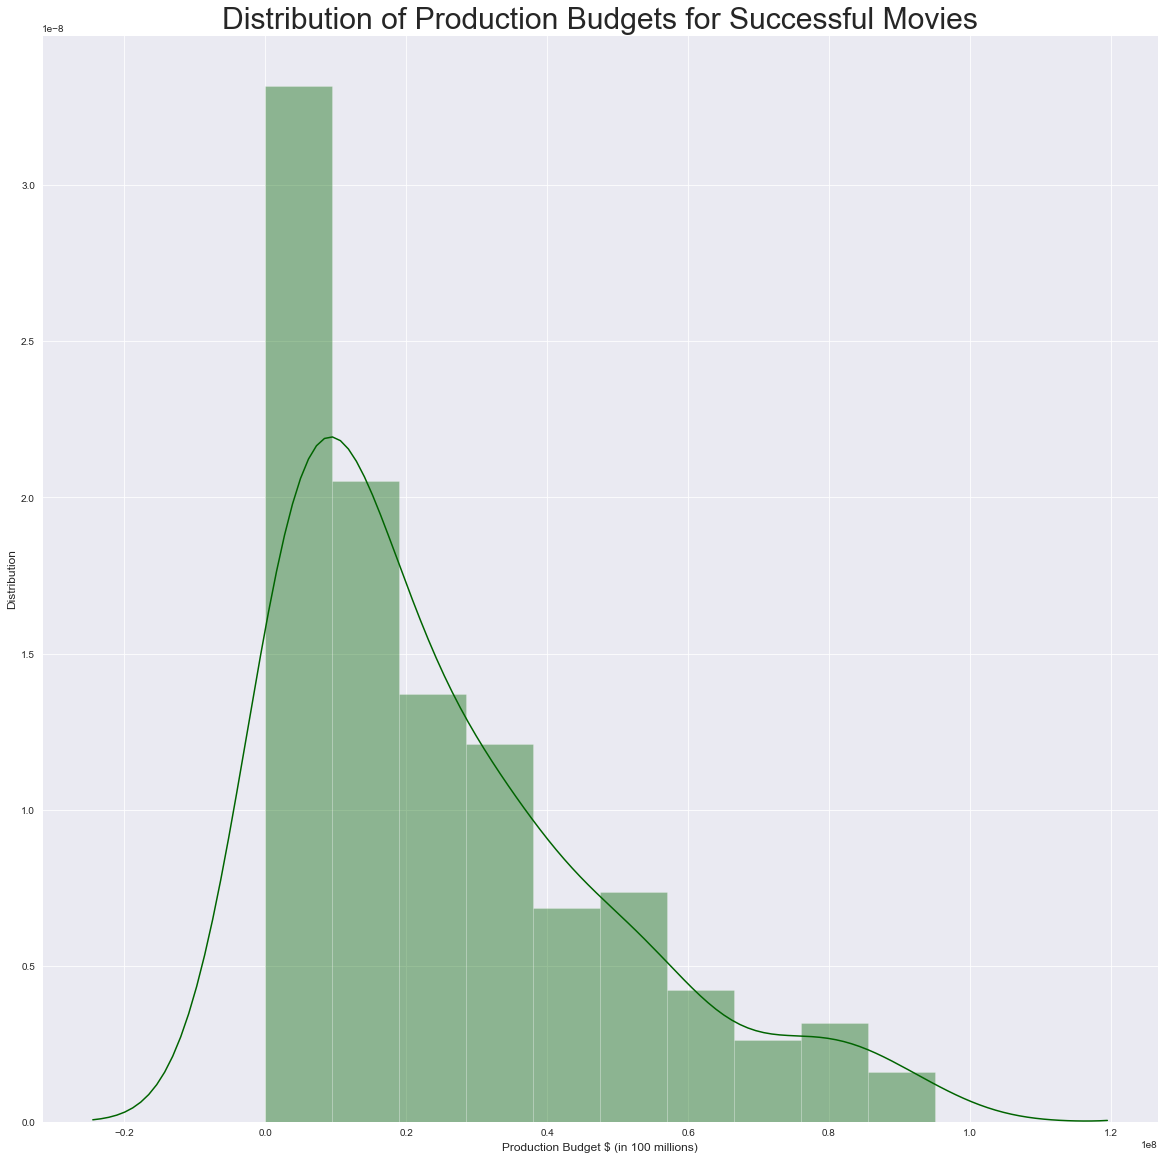

In [40]:
sns.set_style('darkgrid')
sns.color_palette('colorblind')
fig = plt.figure(figsize = (20,20))

ax1 = plt.subplot(111)
sns.distplot(successful_movies['production_budget'], norm_hist=True, bins=10, color='darkgreen', axlabel=False)
ax1.set_title('Distribution of Production Budgets for Successful Movies', fontsize=30)
ax1.set_xlabel('Production Budget $ (in 100 millions)')
ax1.set_ylabel('Distribution');

fig.savefig("images/budgets_hist.png", bbox_inches='tight', dpi=600)

The majority of our list of sucessful movies have a production budget under $40M. The distribution is skewed left, which is good because it means we can spend less money on movies.

Looks like a production budget under $20M is the sweet spot.

### The distribution of genres

In [41]:
genre_strings = list(successful_movies['genres'])

In [42]:
range(0,len(genre_strings))

range(0, 200)

In [43]:
successful_movies['genres'][0]

'Action,Crime,Thriller'

In [44]:
successful_movies['genres'][0].split(',')

['Action', 'Crime', 'Thriller']

In [45]:
genres_tuples = []
for i in range(0,len(genre_strings)):
    genres_tuples.append(successful_movies['genres'][i].split(','))
genres_tuples

[['Action', 'Crime', 'Thriller'],
 ['Action', 'Drama', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'Musical'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Animation', 'Comedy'],
 ['Mystery', 'Thriller'],
 ['Adventure', 'Animation', 'Comedy'],
 ['Animation', 'Comedy', 'Family'],
 ['Drama', 'Horror', 'Thriller'],
 ['Crime', 'Mystery', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Biography', 'Drama', 'History'],
 ['Biography', 'Drama', 'Sport'],
 ['Drama', 'Mystery', 'Thriller'],
 ['Action', 'Adventure', 'Animation'],
 ['Biography', 'Drama'],
 ['Action', 'Comedy', 'Crime'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Biography', 'Drama'],
 ['Biography', 'Drama', 'Music'],
 ['Biography', 'Drama', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Thriller'],
 ['Action', 'Comedy', 'Crime'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Drama', 'Sport'],
 ['Crime', 'Drama', 'T

In [46]:
import itertools
genres_list = list(itertools.chain(*genres_tuples))
print(len(genres_list))
genres_list

502


['Action',
 'Crime',
 'Thriller',
 'Action',
 'Drama',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'Musical',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Animation',
 'Comedy',
 'Mystery',
 'Thriller',
 'Adventure',
 'Animation',
 'Comedy',
 'Animation',
 'Comedy',
 'Family',
 'Drama',
 'Horror',
 'Thriller',
 'Crime',
 'Mystery',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Biography',
 'Drama',
 'History',
 'Biography',
 'Drama',
 'Sport',
 'Drama',
 'Mystery',
 'Thriller',
 'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Drama',
 'Action',
 'Comedy',
 'Crime',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Biography',
 'Drama',
 'Biography',
 'Drama',
 'Music',
 'Biography',
 'Drama',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Thriller',
 'Action',
 'Comedy',
 'Crime',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Drama',
 'Sport',
 'Crime',
 'Drama',
 'Thri

In [47]:
genres = list(set(genres_list))
print(len(genres))
genres

21


['Romance',
 'Sport',
 'Western',
 'Mystery',
 'Documentary',
 'Fantasy',
 'Family',
 'Drama',
 'Horror',
 'Action',
 'Thriller',
 'Music',
 'War',
 'Animation',
 'Sci-Fi',
 'History',
 'Comedy',
 'Musical',
 'Crime',
 'Adventure',
 'Biography']

We have 21 genres. Let's see how many times each one appears in our successful movies.

In [48]:
genres_dict = {}
for genre in genres_list:
    if genre not in genres_dict:
        genres_dict[genre] = 0
    genres_dict[genre] += 1
genres_dict

{'Action': 31,
 'Crime': 26,
 'Thriller': 34,
 'Drama': 151,
 'Sci-Fi': 12,
 'Adventure': 17,
 'Comedy': 64,
 'Animation': 9,
 'Family': 10,
 'Biography': 44,
 'Musical': 1,
 'Mystery': 19,
 'Horror': 11,
 'History': 12,
 'Sport': 9,
 'Music': 6,
 'Romance': 30,
 'War': 3,
 'Western': 1,
 'Fantasy': 4,
 'Documentary': 8}

In [49]:
# Sort the dictionary
genres_sorted = sorted(genres_dict.items(), key=lambda kv: kv[1])
genres_sorted

[('Musical', 1),
 ('Western', 1),
 ('War', 3),
 ('Fantasy', 4),
 ('Music', 6),
 ('Documentary', 8),
 ('Animation', 9),
 ('Sport', 9),
 ('Family', 10),
 ('Horror', 11),
 ('Sci-Fi', 12),
 ('History', 12),
 ('Adventure', 17),
 ('Mystery', 19),
 ('Crime', 26),
 ('Romance', 30),
 ('Action', 31),
 ('Thriller', 34),
 ('Biography', 44),
 ('Comedy', 64),
 ('Drama', 151)]

Let's turn this into a visual

In [50]:
genres_plot = [x[0] for x in genres_sorted]
genres_count_plot = [x[1] for x in genres_sorted]

In [51]:
# Found this to add labels to bars on the internet, but couldn't figure it out
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1.05*height,
               '%d' %int(height), ha='center', va='bottom')

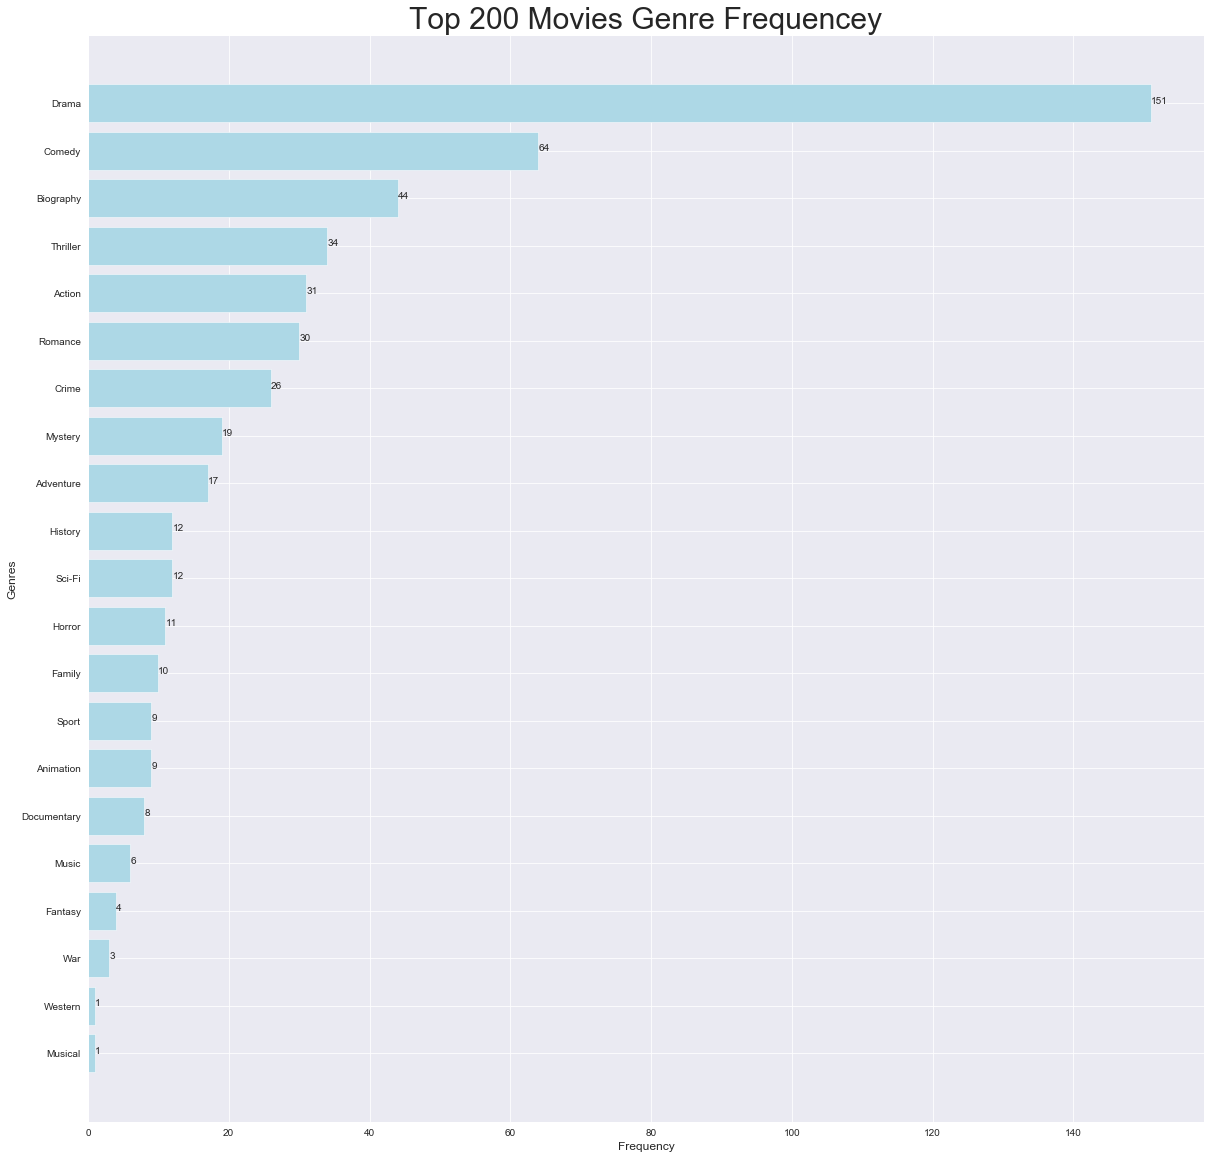

In [52]:
fig = plt.figure(figsize = (20,20))

ax1 = plt.subplot(111)
ax1.barh(y = genres_plot, width = genres_count_plot, color='lightblue')
for index, value in enumerate(genres_count_plot):
    ax1.text(value, index, str(value))
ax1.set_title('Top 200 Movies Genre Frequencey', fontsize=30)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Genres');

fig.savefig("images/genre_freq.png", bbox_inches='tight', dpi=600)

So out of our 200 movies on our shortlist, 151 of them are categorized as Dramas. Sounds like we should make a Drama. The majority of the movies on our list have 2-3 genres, so we should consider including the genres of Comedy, Biography, Thriller, Action, Romance, and Crime.

## Who should we hire to help make our movies?

Let's stick with our database of 200 movies and see the list of people responsible for these films.

In [53]:
successful_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,genres,title_id,ordering,title,region,language,types,attributes,is_original_title,release_year
0,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,"Action,Crime,Thriller",tt7060344,6,Cinderella,NaN,NaN,NaN,NaN,0.0,2015
1,31,"Aug 5, 2011",Rise of the Planet of the Apes,93000000,176760185,470986200,tt1318514,7.6,473020,Rise of the Planet of the Apes,...,"Action,Drama,Sci-Fi",tt1318514,19,Rise of the Planet of the Apes,US,NaN,NaN,NaN,0.0,2011
2,38,"Dec 20, 2017",Jumanji: Welcome to the Jungle,90000000,404508916,964496193,tt2283362,7.0,242735,Jumanji: Welcome to the Jungle,...,"Action,Adventure,Comedy",tt2283362,13,Jumanji: Welcome to the Jungle,NaN,NaN,original,NaN,1.0,2017
3,96,"Sep 28, 2012",Hotel Transylvania,85000000,148313048,378505812,tt0837562,7.1,204571,Hotel Transylvania,...,"Animation,Comedy,Family",tt0837562,14,Hotel Transylvania,AR,NaN,imdbDisplay,NaN,0.0,2012
4,97,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,tt0448115,7.4,109051,Shazam!,...,"Action,Adventure,Comedy",tt0448115,11,Shazam!,FR,NaN,imdbDisplay,NaN,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,74,"Oct 28, 2011",Like Crazy,250000,3395391,3728400,tt4621872,7.2,7156,Like Crazy,...,"Comedy,Drama",tt4621872,21,Like Crazy,DE,NaN,working,NaN,0.0,2011
196,10,"Jul 20, 2012",Burn,225000,1109276,1109276,tt1781784,7.5,663,Burn,...,Documentary,tt1781784,2,Burn,US,NaN,NaN,NaN,0.0,2012
197,43,"Sep 23, 2011",Weekend,190000,484592,1577585,tt1714210,7.6,25424,Weekend,...,"Drama,Romance",tt1714210,13,Weekend,ES,NaN,imdbDisplay,NaN,0.0,2011
198,48,"Jul 22, 2011",Another Earth,175000,1321194,2102779,tt1549572,7.0,85839,Another Earth,...,"Drama,Romance,Sci-Fi",tt1549572,15,Another Earth,US,NaN,NaN,NaN,0.0,2011


In [54]:
# Merge our dataset with 'imdb_crew' so we can get the names of who is involved
# This will take multiple steps since the names are coded
df1 = successful_movies.merge(imdb_crew_df, on='tconst')
print(df1.shape)
df1.head()

(200, 25)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,ordering,title,region,language,types,attributes,is_original_title,release_year,directors,writers
0,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,6,Cinderella,NaN,NaN,NaN,NaN,0.0,2015,nm6442107,nm6442107
1,31,"Aug 5, 2011",Rise of the Planet of the Apes,93000000,176760185,470986200,tt1318514,7.6,473020,Rise of the Planet of the Apes,...,19,Rise of the Planet of the Apes,US,NaN,NaN,NaN,0.0,2011,nm1012501,"nm0415425,nm0798646,nm0099541"
2,38,"Dec 20, 2017",Jumanji: Welcome to the Jungle,90000000,404508916,964496193,tt2283362,7.0,242735,Jumanji: Welcome to the Jungle,...,13,Jumanji: Welcome to the Jungle,NaN,NaN,original,NaN,1.0,2017,nm0440458,"nm0571344,nm1273099,nm0003298,nm0684374,nm0885..."
3,96,"Sep 28, 2012",Hotel Transylvania,85000000,148313048,378505812,tt0837562,7.1,204571,Hotel Transylvania,...,14,Hotel Transylvania,AR,NaN,imdbDisplay,NaN,0.0,2012,nm0850733,"nm0063165,nm0806912,nm0244110,nm1087952,nm1156984"
4,97,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,tt0448115,7.4,109051,Shazam!,...,11,Shazam!,FR,NaN,imdbDisplay,NaN,0.0,2019,nm2497546,"nm2849655,nm0501359,nm1791910,nm1304148"


In [55]:
# Merge our dataset with 'imdb_principals'
df2 = df1.merge(imdb_principals_df, on='tconst')
print(df2.shape)
df2.head()

(1988, 30)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,attributes,is_original_title,release_year,directors,writers,ordering_y,nconst,category,job,characters
0,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,NaN,0.0,2015,nm6442107,nm6442107,10,nm6552934,cinematographer,NaN,NaN
1,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,NaN,0.0,2015,nm6442107,nm6442107,1,nm1099597,actor,NaN,"[""Inspector Rajamanickam""]"
2,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,NaN,0.0,2015,nm6442107,nm6442107,2,nm3905156,actor,NaN,"[""Arun's Houseowner""]"
3,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,NaN,0.0,2015,nm6442107,nm6442107,3,nm0712437,actor,NaN,"[""Doctor Nandhan""]"
4,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,NaN,0.0,2015,nm6442107,nm6442107,4,nm10236476,actor,NaN,"[""Christopher"",""Mary Fernandes""]"


We have a lot more data now beause each movie has several people involved

In [56]:
# What are the occupations of the people in our database now
list(set(df2['category']))

['actor',
 'writer',
 'producer',
 'actress',
 'director',
 'archive_footage',
 'cinematographer',
 'self',
 'editor',
 'composer',
 'production_designer']

That's a very manageable list of occupations. Excellent.

In [57]:
# Merge our dataset with 'imdb_names'
successful_people = df2.merge(imdb_names_df, on='nconst')
print(successful_people.shape)
successful_people.head()

(1988, 35)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,10,nm6552934,cinematographer,NaN,NaN,P.V. Shankar,NaN,NaN,"cinematographer,make_up_department","tt7010156,tt6656734,tt3681442,tt7060344"
1,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,1,nm1099597,actor,NaN,"[""Inspector Rajamanickam""]",Radha Ravi,NaN,NaN,"actor,music_department,soundtrack","tt5459644,tt7715202,tt7060344,tt0213969"
2,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,2,nm3905156,actor,NaN,"[""Arun's Houseowner""]",Sangili Murugan,NaN,NaN,"actor,producer","tt0316078,tt1650433,tt5071886,tt7060344"
3,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,3,nm0712437,actor,NaN,"[""Doctor Nandhan""]",Nizhalgal Ravi,NaN,NaN,actor,"tt0285665,tt1039952,tt7060344,tt0417241"
4,13,"Mar 13, 2015",Cinderella,95000000,201151353,534551353,tt7060344,8.8,10518,Ratsasan,...,4,nm10236476,actor,NaN,"[""Christopher"",""Mary Fernandes""]",Saravanan,NaN,NaN,actor,tt7060344


That appeared to work. Our dataset didn't change length. How many people are involved in these 200 films?

In [58]:
print(len(list(set(successful_people['primary_name']))))
list(set(successful_people['primary_name']))

1626


['Richard Suckle',
 'Markus Selin',
 'Rebecca Hall',
 'Alan Riche',
 'Danny Bensi',
 'Eli Goree',
 'Sue Smith',
 'Michiel Huisman',
 'Zachary Levi',
 'Chris McKay',
 'Keyvan Moghaddam',
 'Jed Palmer',
 'Luke Ciarrocchi',
 'Leanne Saunders',
 'Daniel Day-Lewis',
 'John Francis Daley',
 'Jack Black',
 'Annette Bening',
 'Christophe Lourdelet',
 'Martin Sixsmith',
 'Michelle Dockery',
 'Michael McDonough',
 'Phil Mossman',
 'Hughes Winborne',
 'Shobharaj',
 'William Nicholson',
 'Christopher Storer',
 'Preston Lacy',
 'Jeff Nichols',
 'Vladan Radovic',
 'Charlie Wachtel',
 'Lars Knudsen',
 'Gordon Gray',
 'Maggie Smith',
 'Wes Anderson',
 'Michael Gottwald',
 'Jason Mitchell',
 'Gary Gilbert',
 'Alex Kurtzman',
 'Oprah Winfrey',
 'Mare Winningham',
 'Florian Deyle',
 'Kathryn Bigelow',
 'Justin R. Chan',
 'Selma Blair',
 'Ron Livingston',
 'Seth Grahame-Smith',
 'Brian Kavanaugh-Jones',
 'Stanley Tucci',
 'T.J. Miller',
 'Philippa Kowarsky',
 'Avner Shahaf',
 'Alina Orlova',
 'Danny Elfma

In [59]:
# Let's take a look at how much missing data is in each column
successful_people.isnull().sum()

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
tconst                   0
averagerating            0
numvotes                 0
primary_title            0
original_title           0
start_year               0
runtime_minutes          0
genres                   0
title_id                 0
ordering_x               0
title                    0
region                 597
language              1668
types                  354
attributes            1928
is_original_title        0
release_year             0
directors                0
writers                 30
ordering_y               0
nconst                   0
category                 0
job                   1186
characters            1188
primary_name             0
birth_year             714
death_year            1949
primary_profession      13
known_for_titles         0
dtype: int64

In [60]:
# Excellent! There are only 13 missing values in 'primary_profession'
# Let's drop these records
successful_people.dropna(subset=['primary_profession'], inplace=True)

In [61]:
successful_people.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,averagerating,numvotes,primary_title,...,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
1983,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,5,nm4099092,director,NaN,NaN,Trey Edward Shults,NaN,NaN,"director,writer,editor","tt4266638,tt4695012,tt8652728,tt3091288"
1984,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,6,nm6828709,producer,producer,NaN,Justin R. Chan,NaN,NaN,"producer,miscellaneous","tt4695012,tt3091288,tt4266638"
1985,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,7,nm3829223,producer,producer,NaN,Chase Joliet,NaN,NaN,"actor,producer,director","tt5580602,tt4514926,tt4695012,tt4266638"
1986,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,8,nm5087744,producer,producer,NaN,Wilson Smith,NaN,NaN,"producer,miscellaneous,actor","tt1595656,tt1935179,tt4266638,tt4695012"
1987,38,"Mar 18, 2016",Krisha,30000,144822,144822,tt4266638,7.2,5917,Krisha,...,9,nm4590024,composer,NaN,NaN,Brian McOmber,NaN,NaN,"composer,music_department,soundtrack","tt2119473,tt2882328,tt3091288,tt4695012"


## Let's narrow it down to 4 categories: actors and actresses, directors, writers, producers

In [62]:
actor = successful_people[successful_people['primary_profession'].str.contains("actor")]
actress = successful_people[successful_people['primary_profession'].str.contains("actress")]
actors = actor.append(actress)

In [63]:
directors = successful_people[successful_people['primary_profession'].str.contains("director")]

In [64]:
writers = successful_people[successful_people['primary_profession'].str.contains("writer")]

In [65]:
producers = successful_people[successful_people['primary_profession'].str.contains("producer")]

In [66]:
print('Actors:', actors.shape)
print('Directors:', directors.shape)
print('Writers:', writers.shape)
print('Producers:', producers.shape)

Actors: (1087, 35)
Directors: (503, 35)
Writers: (681, 35)
Producers: (1259, 35)


In [67]:
def top_10(profession):
    profession_dict = {}
    for i in list(profession['primary_name']):
        if i not in profession_dict:
            profession_dict[i] = 0
        profession_dict[i] += 1
    top10 = sorted(profession_dict.items(), key=lambda kv: kv[1])[-10:]
    return top10

In [68]:
top_actors = top_10(actors)
top_actors

[('Rachel McAdams', 4),
 ('Mark Ruffalo', 5),
 ('Steve Carell', 5),
 ('Tom Hanks', 5),
 ('Bradley Cooper', 5),
 ('Emma Stone', 5),
 ('Octavia Spencer', 5),
 ('Ryan Gosling', 6),
 ('Forest Whitaker', 6),
 ('Jason Blum', 7)]

In [69]:
top_directors = top_10(directors)
top_directors

[('Grant Heslov', 3),
 ('David O. Russell', 3),
 ('Damien Chazelle', 3),
 ('Kyle Chandler', 4),
 ('Michael B. Jordan', 4),
 ('George Clooney', 4),
 ('Mark Ruffalo', 5),
 ('Steven Spielberg', 5),
 ('Forest Whitaker', 6),
 ('Scott Rudin', 6)]

In [70]:
top_writers = top_10(writers)
top_writers

[('Jonah Hill', 3),
 ('Tessa Thompson', 3),
 ('Ryan Coogler', 3),
 ('David O. Russell', 3),
 ('Damien Chazelle', 3),
 ('Scott Neustadter', 3),
 ('Michael H. Weber', 3),
 ('Ben Affleck', 4),
 ('Steve Carell', 5),
 ('Steven Spielberg', 5)]

In [71]:
top_producers = top_10(producers)
top_producers

[('Steve Carell', 5),
 ('Steven Spielberg', 5),
 ('Tom Hanks', 5),
 ('Bradley Cooper', 5),
 ('Emma Stone', 5),
 ('Octavia Spencer', 5),
 ('Ryan Gosling', 6),
 ('Forest Whitaker', 6),
 ('Scott Rudin', 6),
 ('Jason Blum', 7)]

Let's plot!

In [72]:
top_overall = top_10(successful_people)
top_overall

[('Steven Spielberg', 5),
 ('Tom Hanks', 5),
 ('Bradley Cooper', 5),
 ('Emma Stone', 5),
 ('Octavia Spencer', 5),
 ('Alexandre Desplat', 6),
 ('Ryan Gosling', 6),
 ('Forest Whitaker', 6),
 ('Scott Rudin', 6),
 ('Jason Blum', 7)]

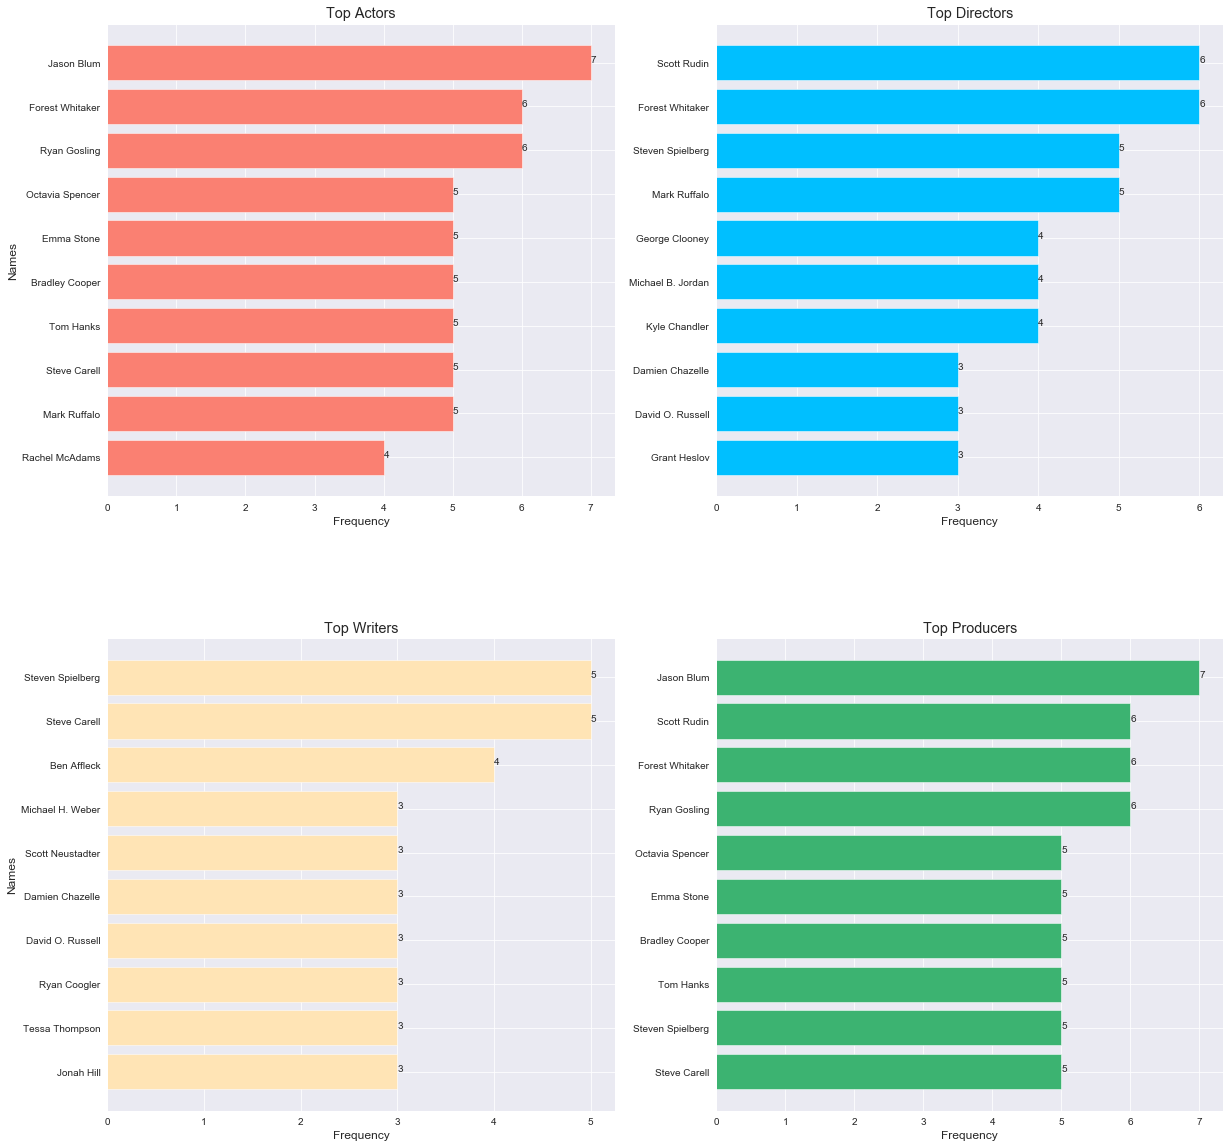

In [73]:
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(hspace=0.3)

actor_people = [x[0] for x in top_actors]
actor_counts = [x[1] for x in top_actors]
director_people = [x[0] for x in top_directors]
director_counts = [x[1] for x in top_directors]
writer_people = [x[0] for x in top_writers]
writer_counts = [x[1] for x in top_writers]
producer_people = [x[0] for x in top_producers]
producer_counts = [x[1] for x in top_producers]

ax1 = plt.subplot(221)
ax1.barh(y = actor_people, width = actor_counts, color='salmon')
for index, value in enumerate(actor_counts):
    ax1.text(value, index, str(value))
ax1.set_title('Top Actors')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Names')

ax2 = plt.subplot(222)
ax2.barh(y = director_people, width = director_counts, color='deepskyblue')
for index, value in enumerate(director_counts):
    ax2.text(value, index, str(value))
ax2.set_title('Top Directors')
ax2.set_xlabel('Frequency')

ax3 = plt.subplot(223)
ax3.barh(y = writer_people, width = writer_counts, color='moccasin')
for index, value in enumerate(writer_counts):
    ax3.text(value, index, str(value))
ax3.set_title('Top Writers')
ax3.set_xlabel('Frequency')
ax3.set_ylabel('Names')

ax4 = plt.subplot(224)
ax4.barh(y = producer_people, width = producer_counts, color='mediumseagreen')
for index, value in enumerate(producer_counts):
    ax4.text(value, index, str(value))
ax4.set_title('Top Producers')
ax4.set_xlabel('Frequency');

fig.savefig("images/top_professions.png", bbox_inches='tight', dpi=600)

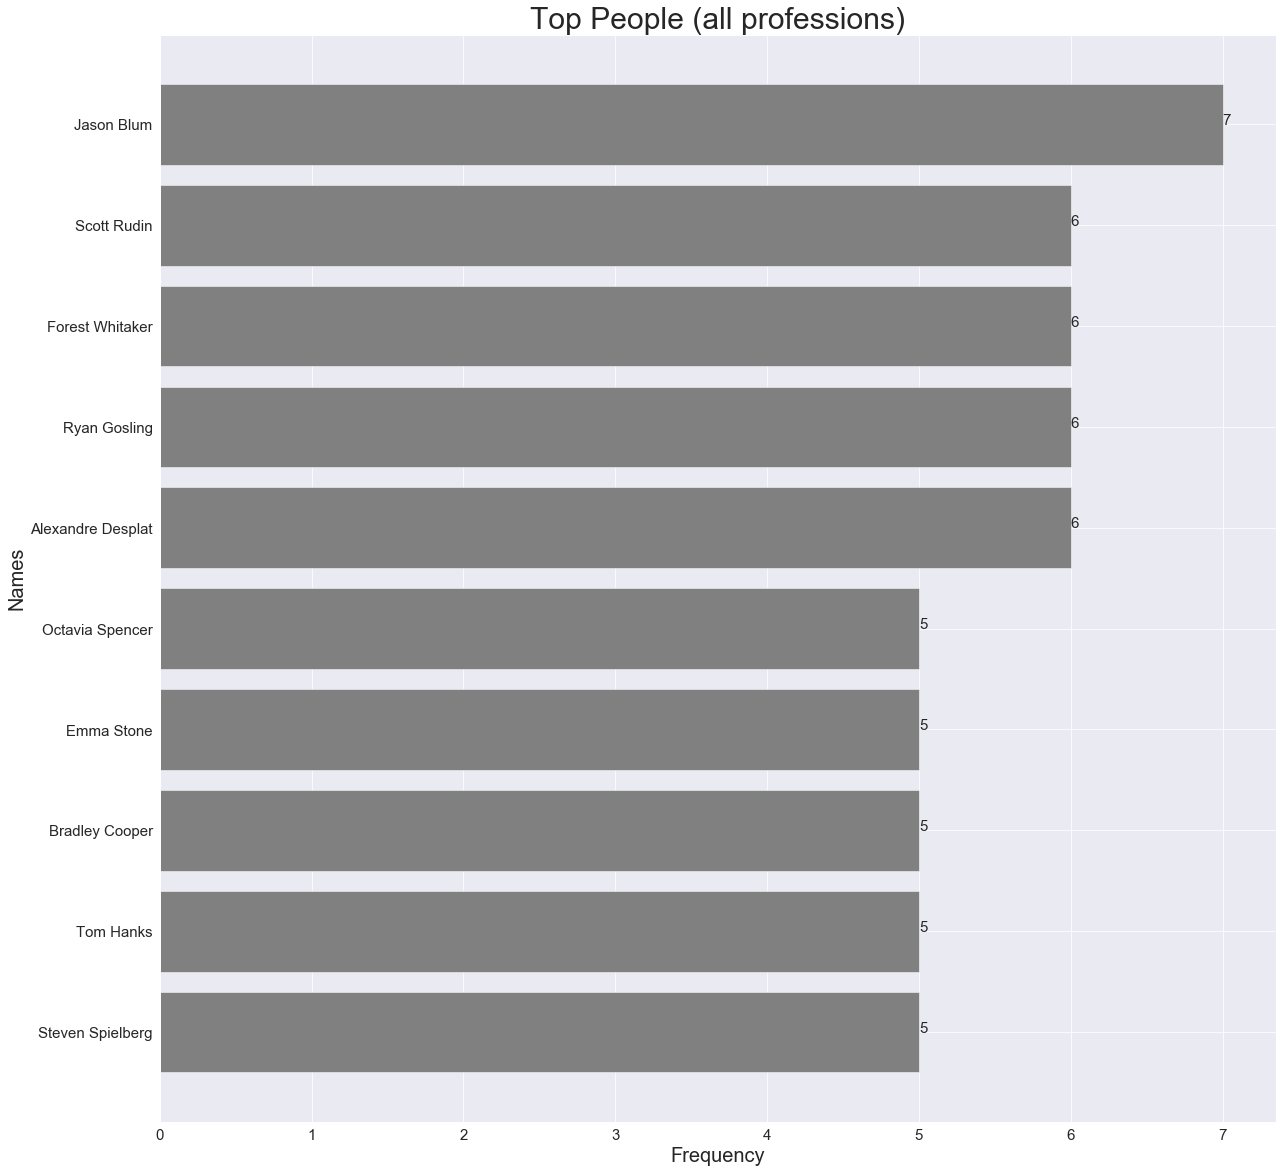

In [74]:
fig = plt.figure(figsize = (20,20))

overall_people = [x[0] for x in top_overall]
overall_counts = [x[1] for x in top_overall]

ax1 = plt.subplot(111)
ax1.barh(y = overall_people, width = overall_counts, color='grey')
for index, value in enumerate(overall_counts):
    ax1.text(value, index, str(value), fontsize=15)
ax1.set_title('Top People (all professions)', fontsize=30)
ax1.set_xlabel('Frequency', fontsize=20)
ax1.set_ylabel('Names', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

fig.savefig("images/top_people.png", bbox_inches='tight', dpi=600)

In [78]:
# Who is Alandre Desplat?
desplat = successful_people[successful_people['primary_name'] == 'Alexandre Desplat']
print(list(set(desplat['primary_profession'])))
print(list(set(desplat['category'])))

['composer,music_department,soundtrack']
['composer']


## Summary

In this project, my findings are:

* "How I chose the question(s) above."

I first looked through the datasets to see the connections between them all and what would be useful. The main drivers in starting to answer this question were what defines a successful movie? (1) While a 'good movie' has a rating of at least 5.0, a 'great movie' should have a rating of at least 7.0. The 7.0 target is more relevant because we'll shoot for greatness and hope to come close. (2) It needs to have at least 100 rating votes otherwise we're just relying on a few people who liked or didn't like the movie. (3) After looking at the scatter plot of the Production Budgets and a mean of 61 million, I decided to only look at movies that had a production budget until 100 million. (4) There are a lot of other costs for a movie outside the production budget including advertising and premiers. In order to ensure the movies we were looking at are profitable including the extras, I only looked at movies that have a domestic gross 50% higher than the production budget. (5) I only included movies released in the last 20 years since the people and techniques before than probably won't translate to success.

* "Why are these questions important from a business perspective?"

Who, what, and how much are the main questions from a business perspective. Who can we contact (top contributers)? What kind of movie are we making (genre)? How much do we need to spend (production budget)? I focused on financial success domestically because a new studio would likely have to release in the US before it did elsewhere.

* "How I decided on the data cleaning options I performed."

I made sure I was looking at complete data. The largest dataset was `imdb.title.akas.csv` with 331,703 rows of data. This data didn't include any information of the budget, gross, genres, ratings, release date, cast and crew, so once I joined it with the other data I needed we were down eventually to a short list of 200 movies that fit the criteria for 'successful.' I did this through inner merging and filtering. It's relatively easy to go back and change the criteria if needed.

* "Why did I choose a given method or library?"

I chose to focus on the `IMDB` datasets as well as the `tn.movie_budgets.csv` file. Between these files, I could analyze genre, production budget, domestic gross, cast and crew, and ratings. The `Rotten Tomatoes` dataset was a fraction of the size and didn't include vital information like the Title to join it with the budgets data, so I ignored it. I also ignored (1) `tmdb.movies.csv` because it was a third of the size of `imdb.title.ratings.csv` and wouldn't join with the rest of the data as well, and (2) `bom.movie_gross.csv` because it had less information than `tn.movie_budgets.csv`.

* "Why did I select these visualizations and what did I learn from each of them?"

The first visualization was to see the range of production budgets and see how each of the movies did compared to domestic and worldwide gross. The relationship was largely linear will a lot of outliers over the 200 million threshold for production budget. Knowing that this would be a new studio, outlandish budgets are probably out of the question anyway.

Once I had my list of 200 successful movies, I looked at the distribution of production budgets again knowing that all of them were profitable movies and found the largest percentage of movies had a production budget under 20 million and even under 10 million.

Next I looked at the genres in list of movies. Generally, the movies had 2-3 genres associated with them. Dramas far outpreformed the rest, with Comedy, Biography, Thriller, Action, Romance, and Crime associated with at least 10% of the list.

Lastly I looked at who the successful players in movies have been over the last 20 years. Out of these 200 movies, several people have been involved in quite a few of these titles and might want to make more movies with other successful players. I created visualizations of the top people across all professions as well as the top actors, directors, writers, and producers to potentially work with.

* "How I interpret the results."

My advice would be to reach out to the top 10 movie contributors to see if we can make a drama + 1-2 of the other genres with a production budget of under 20 million.

* "How confident am I in the predictive quality of the results?"

People can define what a successful movie is in many different ways. Based on these parameters, I think my results are accurate.

* "What are some of the things that could cause the results to be wrong?"

If more data was introduced that contradicted the data I based my predictions on, it would case my results to be wrong.